In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import Operator

def pcphase(phi, dim, num_qubits):
    """
    Returns a Diagonal gate implementing the PCPhase(phi, dim) operation.
    """
    N = 2 ** num_qubits
    # Construct diagonal elements
    diag = np.array([np.exp(1j * phi) if i < dim else np.exp(-1j * phi) for i in range(N)])
    # Create Diagonal gate
    return Diagonal(diag)

# Example: 2 qubits, dim=3, phi=pi/4
num_qubits = 3
dim = 1
phi = np.pi / 8

qc = QuantumCircuit(num_qubits)
qc.append(pcphase(phi, dim, num_qubits), range(num_qubits))
matrix = Operator(qc).data

# Print the matrix
np.set_printoptions(precision=4, suppress=True)
print(matrix)
qc.decompose().decompose().decompose().decompose().decompose().draw('text')


[[0.9239+0.3827j 0.    +0.j     0.    +0.j     0.    +0.j
  0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.9239-0.3827j 0.    +0.j     0.    +0.j
  0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.9239-0.3827j 0.    +0.j
  0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.    +0.j     0.9239-0.3827j
  0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j
  0.9239-0.3827j 0.    +0.j     0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j
  0.    +0.j     0.9239-0.3827j 0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j
  0.    +0.j     0.    +0.j     0.9239-0.3827j 0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.    +0.j     0.    +0.j
  0.    +0.j     0.    +0.j     0.    +0.j     0.9239-0.3827j]]


global phase: π/8
     ┌───────────┐┌───┐┌───────────┐┌───┐┌───────────┐┌───┐┌───────────┐┌───┐»
q_0: ┤ U1(-π/16) ├┤ X ├┤ U1(-π/16) ├┤ X ├┤ U1(-π/16) ├┤ X ├┤ U1(-π/16) ├┤ X ├»
     └───────────┘└─┬─┘└───────────┘└─┬─┘└───────────┘└─┬─┘├───────────┤└─┬─┘»
q_1: ───────────────■─────────────────┼─────────────────■──┤ U1(-π/16) ├──┼──»
                                      │                    └───────────┘  │  »
q_2: ─────────────────────────────────■───────────────────────────────────■──»
                                                                             »
«                                         
«q_0: ────────────────────────────────────
«     ┌───┐┌───────────┐┌───┐             
«q_1: ┤ X ├┤ U1(-π/16) ├┤ X ├─────────────
«     └─┬─┘└───────────┘└─┬─┘┌───────────┐
«q_2: ──■─────────────────■──┤ U1(-π/16) ├
«                            └───────────┘

In [2]:

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Apply gates as in the diagram
qc.rz(-np.pi/8, 0)

qc.cx(1,0)
qc.rz(np.pi/8, 0)

qc.cx(1,0)
qc.rz(-np.pi/8, 1)

# Draw the circuit to verify
print(qc.draw('text'))
print("::::::::::::::::::")
from qiskit.circuit.library import GlobalPhaseGate
# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

qc.append(GlobalPhaseGate(np.pi/16))
# Add the global phase
#qc.global_phase = np.pi / 16

# Apply gates as in the diagram
qc.rz(-np.pi/8, 0)

qc.cx(1,0)
qc.rz(np.pi/8, 0)

qc.cx(1,0)
qc.rz(-np.pi/8, 1)

# Draw the circuit to verify
print(qc.draw('text'))


     ┌──────────┐┌───┐┌─────────┐┌───┐            
q_0: ┤ Rz(-π/8) ├┤ X ├┤ Rz(π/8) ├┤ X ├────────────
     └──────────┘└─┬─┘└─────────┘└─┬─┘┌──────────┐
q_1: ──────────────■───────────────■──┤ Rz(-π/8) ├
                                      └──────────┘
::::::::::::::::::
     ┌──────────┐┌───┐┌─────────┐┌───┐            
q_0: ┤ Rz(-π/8) ├┤ X ├┤ Rz(π/8) ├┤ X ├────────────
     └──────────┘└─┬─┘└─────────┘└─┬─┘┌──────────┐
q_1: ──────────────■───────────────■──┤ Rz(-π/8) ├
                                      └──────────┘


In [3]:
matrix = Operator(qc).data

# Print the matrix
np.set_printoptions(precision=4, suppress=True)
print(matrix)

[[0.9239+0.3827j 0.    +0.j     0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.9239+0.3827j 0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.9239+0.3827j 0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.    +0.j     0.9239-0.3827j]]


In [4]:
phase_angles = np.array([0.0, 1.0, 2.0, 3.0])
projectors=[pcphase(angle, 2, 2) for angle in phase_angles]




In [125]:
from fable import fable
A = np.array([[0.3, 0.4], [0.5, 0.6]])
circ,alpha=fable(A)
circ.draw()

»
q_0: ────────────────■──────────────────────────────────────────■──»
         ┌───┐       │                                          │  »
q_1: ────┤ H ├───────┼───────────────────■──────────────────────┼──»
     ┌───┴───┴────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────────┐┌─┴─┐»
q_2: ┤ Ry(2.1999) ├┤ X ├┤ Ry(0.11336) ├┤ X ├┤ Ry(-0.0065391) ├┤ X ├»
     └────────────┘└───┘└─────────────┘└───┘└────────────────┘└───┘»
«                                 
«q_0: ─────────────────────X──────
«                          │ ┌───┐
«q_1: ─────────────────■───X─┤ H ├
«     ┌─────────────┐┌─┴─┐   └───┘
«q_2: ┤ Ry(0.22545) ├┤ X ├────────
«     └─────────────┘└───┘

In [107]:
def QSVT(block,projectors):
    #dim sara la dim di block, l'offset di projectors sara la differenza tra proj nqbits and block nqbits
    dim_projectors=projectors[0].num_qubits
    dim_block=block.num_qubits
    offset=dim_block-dim_projectors
    qc=QuantumCircuit(dim_block)
    qc.append(projectors[0],[i for i in range(dim_projectors)])
    for index in range(1,len(projectors)):
        qc.append(block,[i for i in range(0,dim_block)])
        qc.append(projectors[index],[i for i in range(dim_projectors)])
    return qc

qc=QSVT(circ,projectors)
    

In [109]:
qc.draw()

┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
     │  Diagonal ││                 ││  Diagonal ││                 │»
q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
     └───────────┘│                 │└───────────┘│                 │»
q_2: ─────────────┤2                ├─────────────┤2                ├»
                  └─────────────────┘             └─────────────────┘»
«     ┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
«q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
«     │  Diagonal ││                 ││  Diagonal ││                 │»
«q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
«     └───────────┘│                 │└───────────┘│                 │»
«q_2: ─────────────┤2                ├─────────────┤2                ├»
«                  └─────────────────┘             └─────────────────┘»
«     ┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
«q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
«     │  Diagonal ││                 ││  Diagonal ││                 │»
«q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
«     └───────────┘│                 │└───────────┘│                 │»
«q_2: ─────────────┤2                ├─────────────┤2                ├»
«                  └─────────────────┘             └─────────────────┘»
«     ┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
«q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
«     │  Diagonal ││                 ││  Diagonal ││                 │»
«q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
«     └───────────┘│                 │└───────────┘│                 │»
«q_2: ─────────────┤2                ├─────────────┤2                ├»
«                  └─────────────────┘             └─────────────────┘»
«     ┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
«q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
«     │  Diagonal ││                 ││  Diagonal ││                 │»
«q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
«     └───────────┘│                 │└───────────┘│                 │»
«q_2: ─────────────┤2                ├─────────────┤2                ├»
«                  └─────────────────┘             └─────────────────┘»
«     ┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
«q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
«     │  Diagonal ││                 ││  Diagonal ││                 │»
«q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
«     └───────────┘│                 │└───────────┘│                 │»
«q_2: ─────────────┤2                ├─────────────┤2                ├»
«                  └─────────────────┘             └─────────────────┘»
«     ┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
«q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
«     │  Diagonal ││                 ││  Diagonal ││                 │»
«q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
«     └───────────┘│                 │└───────────┘│                 │»
«q_2: ─────────────┤2                ├─────────────┤2                ├»
«                  └─────────────────┘             └─────────────────┘»
«     ┌───────────┐┌─────────────────┐┌───────────┐┌─────────────────┐»
«q_0: ┤0          ├┤0                ├┤0          ├┤0                ├»
«     │  Diagonal ││                 ││  Diagonal ││                 │»
«q_1: ┤1          ├┤1 circuit-196900 ├┤1          ├┤1 circuit-196900 ├»
«     └───────────┘│                 │└───────────┘│                 │»
«q_2: ─────────────┤2                ├─────────────┤2                ├»
«                  └─────────────────┘             └

In [11]:
!pip install pyqsp
import pyqsp

In [41]:
kappa=4
from pyqsp import angle_sequence
pcoefs, s = pyqsp.poly.PolyOneOverX().generate(kappa, return_coef=True, ensure_bounded=True, return_scale=True)
phi_pyqsp = angle_sequence.QuantumSignalProcessingPhases(pcoefs, signal_operator="Wx", tolerance=0.00001)

b=59, j0=21
[PolyOneOverX] minimum [-4.9282] is at [-0.1462]: normalizing
[PolyOneOverX] bounding to 0.9


In [43]:
projectors=[pcphase(angle, 2, 2) for angle in phi_pyqsp]
qc=QSVT(circ,projectors)


In [44]:
matrix=Operator(qc).data

In [45]:
matrix[0:2,0:2].real/s

array([[2.2363, 1.9325],
       [1.9705, 1.2497]])

In [127]:
# Compute the inverse of the matrix
A_inv = np.linalg.inv(A)

# Print the inverse matrix
print(A_inv)

[[-30.  20.]
 [ 25. -15.]]


In [59]:
!pip install pennylane

  Using cached autograd-1.8.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached autoray-0.7.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached diastatic_malt-2.15.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached scipy_openblas32-0.3.30.0.2-py3-none-win_amd64.whl.metadata (56 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/4.8 MB ? eta -:--:--
   ---------- ----------------------------- 1.3/4.8 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 2.6/4.8 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 4.8/4.8 MB 8.1 MB/s eta 0:00:00
Using cached autoray-0.7.2-py3-none-any.whl (930 kB)
   ---------------------------------------- 0.0/6.6 MB ? eta -:--:--
   ------------ --------------------------- 2.1/6.6 MB 9.8 MB/s eta 0:00:01
   --------------------

In [85]:
x_vals = np.linspace(0, 1, 50)
target_y_vals = [s * (1 / x) for x in np.linspace(s, 1, 50)]
kappa=4
pcoefs, s = pyqsp.poly.PolyOneOverX().generate(kappa, return_coef=True, ensure_bounded=True, return_scale=True)
phi_pyqsp = angle_sequence.QuantumSignalProcessingPhases(pcoefs, signal_operator="Wx", tolerance=0.00001)
import pennylane as qml
from qiskit.circuit.library import UnitaryGate
qsvt_y_vals = []
for x in x_vals:

    block_encoding =qml.BlockEncode(x, wires=[0])
    mat=qml.matrix(block_encoding)
    be=QuantumCircuit(1)
    gate = UnitaryGate(mat)
    be.append(gate,[0])
    phi_qsvt = qml.transform_angles(phi_pyqsp, "QSP", "QSVT")  # convert pyqsp angles to be compatible with QSVT
    projectors=[pcphase(angle, 1, 1) for angle in phi_qsvt]
    qc=QSVT(be,projectors)
    data=Operator(qc).data
    qsvt_y_vals.append(np.real(data[0,0]))

b=59, j0=21
[PolyOneOverX] minimum [-4.9282] is at [-0.1462]: normalizing
[PolyOneOverX] bounding to 0.9


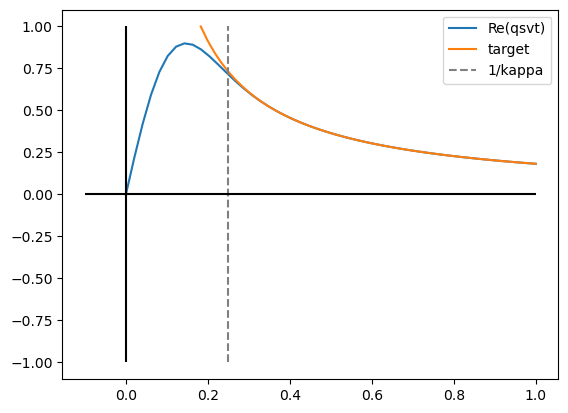

In [87]:
import matplotlib.pyplot as plt

plt.plot(x_vals, np.array(qsvt_y_vals), label="Re(qsvt)")
plt.plot(np.linspace(s, 1, 50), target_y_vals, label="target")

plt.vlines(1 / kappa, -1.0, 1.0, linestyle="--", color="grey", label="1/kappa")
plt.vlines(0.0, -1.0, 1.0, color="black")
plt.hlines(0.0, -0.1, 1.0, color="black")

plt.legend()
plt.show()

In [129]:
circ,a=fable(A)
be.append(gate,[0])
phi_qsvt = qml.transform_angles(phi_pyqsp, "QSP", "QSVT")  # convert pyqsp angles to be compatible with QSVT
projectors=[pcphase(angle, 2, 2) for angle in phi_qsvt]
qc=QSVT(circ,projectors)
data=Operator(qc).data
data[0,0]*s

array([-0.0161+0.0894j])

In [131]:
data[0,0].real/s

array([-0.4827])